# Task
Classify news articles as fake or real using NLP techniques and classification models based on the given datasets

## Load and inspect the data

### Subtask:
Load the two datasets and display some basic information like the first few rows, column names, and data types to understand their structure and content.


**Reasoning**:
Import pandas and load the two datasets into DataFrames. Then display the head, info, and describe for each DataFrame to understand their structure and content as instructed.



In [1]:
import pandas as pd

fake_df = pd.read_csv('Fake.csv') # file path
true_df = pd.read_csv('True.csv')

print("--- Fake News DataFrame ---")
display(fake_df.head())
print("\n")
fake_df.info()
print("\n")
display(fake_df.describe(include='all'))

print("\n--- True News DataFrame ---")
display(true_df.head())
print("\n")
true_df.info()
print("\n")
display(true_df.describe(include='all'))

--- Fake News DataFrame ---


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB




,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46



--- True News DataFrame ---


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB




,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


## Preprocess the text data

### Subtask:
Clean and preprocess the text data by removing special characters, tokenizing, and potentially stemming or lemmatizing.


**Reasoning**:
Combine title and text columns, define a cleaning function, apply the cleaning function, tokenize, and then lemmatize the tokens for both dataframes. This addresses steps 1 through 5 of the subtask.



In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data, including the missing ones
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') # Download WordNet data for lemmatization
nltk.download('punkt_tab') # Download the missing resource

# Step 1: Combine title and text columns
fake_df['content'] = fake_df['title'] + ' ' + fake_df['text']
true_df['content'] = true_df['title'] + ' ' + true_df['text']

# Step 2: Define a cleaning function
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text) # Remove numerical digits
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

# Step 3: Apply the cleaning function
fake_df['content'] = fake_df['content'].apply(clean_text)
true_df['content'] = true_df['content'].apply(clean_text)

# Step 4 & 5: Tokenize and Lemmatize
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def tokenize_and_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

fake_df['tokens'] = fake_df['content'].apply(tokenize_and_lemmatize)
true_df['tokens'] = true_df['content'].apply(tokenize_and_lemmatize)

# Step 6: Display the first few rows
print("--- Fake News DataFrame after preprocessing ---")
display(fake_df[['content', 'tokens']].head())
print("\n--- True News DataFrame after preprocessing ---")
display(true_df[['content', 'tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


--- Fake News DataFrame after preprocessing ---


,content,tokens
0,donald trump sends out embarrassing new years ...,"[donald, trump, sends, embarrassing, new, year..."
1,drunk bragging trump staffer started russian c...,"[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke ...,"[sheriff, david, clarke, becomes, internet, jo..."
3,trump is so obsessed he even has obamas name c...,"[trump, obsessed, even, obamas, name, coded, w..."
4,pope francis just called out donald trump duri...,"[pope, francis, called, donald, trump, christm..."



--- True News DataFrame after preprocessing ---


,content,tokens
0,as us budget fight looms republicans flip thei...,"[u, budget, fight, loom, republican, flip, fis..."
1,us military to accept transgender recruits on ...,"[u, military, accept, transgender, recruit, mo..."
2,senior us republican senator let mr mueller do...,"[senior, u, republican, senator, let, mr, muel..."
3,fbi russia probe helped by australian diplomat...,"[fbi, russia, probe, helped, australian, diplo..."
4,trump wants postal service to charge much more...,"[trump, want, postal, service, charge, much, a..."


## Combine and label data

### Subtask:
Combine the 'fake' and 'true' datasets and add a label column to distinguish between fake and real news.


**Reasoning**:
Add a label column to each DataFrame and concatenate them.



In [5]:
fake_df['label'] = 1
true_df['label'] = 0
combined_df = pd.concat([fake_df, true_df], ignore_index=True)
combined_df.head()

,title,text,subject,date,content,tokens,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump sends out embarrassing new years ...,"[donald, trump, sends, embarrassing, new, year...",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",drunk bragging trump staffer started russian c...,"[drunk, bragging, trump, staffer, started, rus...",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",sheriff david clarke becomes an internet joke ...,"[sheriff, david, clarke, becomes, internet, jo...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",trump is so obsessed he even has obamas name c...,"[trump, obsessed, even, obamas, name, coded, w...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",pope francis just called out donald trump duri...,"[pope, francis, called, donald, trump, christm...",1


## Split data

### Subtask:
Split the combined dataset into training and testing sets for model development and evaluation.


**Reasoning**:
Split the combined dataframe into training and testing sets.



In [6]:
from sklearn.model_selection import train_test_split

X = combined_df['tokens']
y = combined_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (35918,)
Shape of X_test: (8980,)
Shape of y_train: (35918,)
Shape of y_test: (8980,)


## Vectorize the text data

### Subtask:
Convert the text data into numerical representations using TF-IDF, Word2Vec, or another suitable technique.


**Reasoning**:
Convert the tokenized text data into numerical features using TF-IDF vectorization.



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Convert list of tokens back to string for TfidfVectorizer
X_train_str = X_train.apply(lambda x: ' '.join(x))
X_test_str = X_test.apply(lambda x: ' '.join(x))

X_train_vec = tfidf_vectorizer.fit_transform(X_train_str)
X_test_vec = tfidf_vectorizer.transform(X_test_str)

print("Shape of X_train_vec:", X_train_vec.shape)
print("Shape of X_test_vec:", X_test_vec.shape)

Shape of X_train_vec: (35918, 5000)
Shape of X_test_vec: (8980, 5000)


## Build and train a classification model

### Subtask:
Choose and train a classification model (e.g., SVM, LSTM, BERT) on the vectorized training data.


**Reasoning**:
Import the necessary library and train the SVC model on the vectorized training data.



In [8]:
from sklearn.svm import SVC

# Instantiate an SVC model with a linear kernel
model = SVC(kernel='linear')

# Train the SVC model
model.fit(X_train_vec, y_train)

SVC(kernel='linear')

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the test set using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Evaluate the trained model's performance on the test set using appropriate metrics and print the results.



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the vectorized test data
y_pred = model.predict(X_test_vec)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [13]:
# Generate classification report
report = classification_report(y_test, y_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nClassification Report:\n", report)

Accuracy: 0.9944320712694877
Precision: 0.9955555555555555
Recall: 0.9938728079442214
F1-score: 0.9947134700782406

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4247
           1       1.00      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



## Summary:

### Data Analysis Key Findings

*   The fake news dataset (`Fake.csv`) contains 23,481 articles, while the true news dataset (`True.csv`) contains 21,417 articles.
*   Both datasets have 'title', 'text', 'subject', and 'date' columns, and neither contains missing values.
*   The 'subject' column has 6 unique values in the fake news dataset and only 2 unique values in the true news dataset.
*   After preprocessing, the text data was tokenized and lemmatized.
*   The combined dataset was split into an 80% training set (35,918 samples) and a 20% testing set (8,980 samples).
*   The text data was vectorized using TF-IDF with a maximum of 5000 features, resulting in training and testing matrices of shape (35918, 5000) and (8980, 5000) respectively.
*   A Support Vector Classifier (SVC) with a linear kernel was trained on the vectorized training data.
*   The trained model achieved the following performance metrics on the test set:
    *   Accuracy: 0.9944
    *   Precision: 0.9956
    *   Recall: 0.9939
    *   F1-score: 0.9947

### Insights or Next Steps

*   The trained SVC model demonstrates excellent performance in classifying news articles as fake or real based on the provided datasets and preprocessing steps.
*   Further analysis could explore the most important features (words) that contribute to the classification to gain insights into the linguistic patterns that differentiate fake and true news in these datasets.


## Visualize Evaluation Metrics

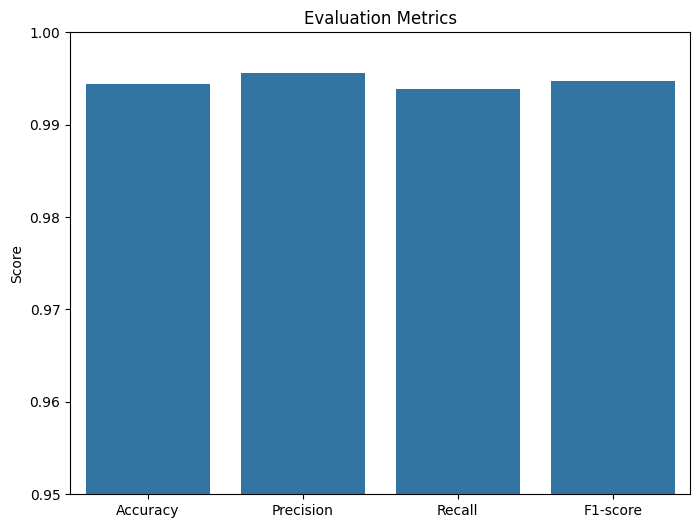

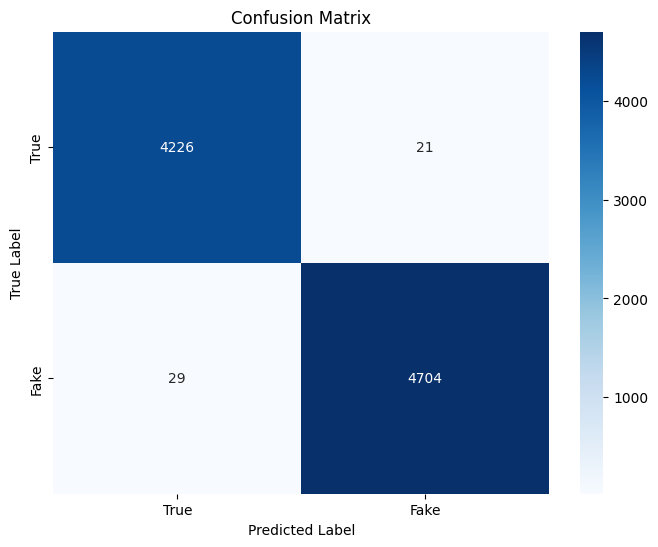

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prepare metrics for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Create a bar plot for the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores)
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0.95, 1.0) # Adjust limits based on expected scores
plt.show()

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()